#### Universidade Federal de Santa Catarina
#### Programa de Pós-Graduação em Engenharia Elétrica
#### Modelagem Dinâmica de Conversores Estáticos

## Resolução da Tarefa 3

Data: 30/05/2022 a 01/06/2022

Discente: Eduardo Eller Behr

![enunciado](enunciado.png)

### I) Modelo médio de grandes sinais utilizando "PWM Switch Modeling"

Para realizar a modelagem média PWM das chaves é necessário sintetizar todas as etapas de operações do circuito considerado ao longo de um período de comutação.

As tabelas abaixo indicam tensões e correntes de cada semicondutor em ambas as etapas:

---

#### Chave $S_1$  fechada

| Primeira etapa    | Tensão    | Corrente          |
|-------------------|-----------|-------------------|
| $D_1$             | $-v_{C1}$ | $0$               |
| $D_2$             | $0$       | $i_{L1}$          |
| $D_3$             | $-v_o$    | $0$               |
| $S_1$             | $0$       | $i_{L1}+i_{L2}$   |
---

#### Chave $S_1$ aberta


| Segunda etapa     | Tensão        | Corrente  |
|-------------------|---------------|-----------|
| $D_1$             | $0$           | $i_{L1}$  |
| $D_2$             | $v_{C1}-v_o$  | $0$       |
| $D_3$             | $0$           | $i_{L2}$  |
| $S_1$             | $v_o$         | $0$       |
---

Optou-se por modelar os semicondutores como fontes dependentes de acordo com a tabela da segunda etapa de operação. Como as grandezas se alternam entre $0$ e uma combinação linear dos valores médios das variáveis de estado, as fontes controladas serão definidas com esses mesmos valores ponderados pela razão cíclica considerada $(1-d)$, ou seja:

#### $i_{D_1} = (1-d) i_{L1}$
#### $v_{D_2} = (1-d) (v_{C1}-v_o)$
#### $i_{D_3} = (1-d) i_{L2}$
#### $v_{S_1} = (1-d) v_o$

O diagrama elétrico equivalente resultante está ilustrado na figura abaixo.

![sch](MMGS_PWM_MODEL.png)

### II) Modelo Médio de Pequenos Sinais

Para obter o modelo de pequenos sinais, foi efetuada a modelagem de espaço de estados diretamente, já que será necessário deduzir a função de transferência posteriormente. Se fosse utilizado o modelo das chaves PWM, seria necessário resolver o circuito equivalente, que resultaria no mesmo.

Analisando as etapas de operação novamente, obtem-se as seguintes equações diferenciais de estados:

##### $L_1 \frac{d i_{L1}}{dt} = v_i - (1-d) v_{C1}$
##### $L_2 \frac{d i_{L2}}{dt} = v_{C1} - (1-d) v_{o}$
##### $C_1 \frac{d v_{C1}}{dt} = -i_{L2} + (1-d) i_{L1}$
##### $C_2 \frac{d v_{o}}{dt} = -\frac{v_o}{R} + (1-d) i_{L2} $

Após linearizá-las pelo método dos desvios pequenos, considerar que as variáveis minúsculas se referem a pequenos desvios:

##### $L_1 \frac{d i_{L1}}{dt} = - (1-D) v_{C1} + d V_{C1}$
##### $L_2 \frac{d i_{L2}}{dt} = v_{C1} - (1-D) v_{o} + d V_o$
##### $C_1 \frac{d v_{C1}}{dt} = -i_{L2} + (1-D) i_{L1} -d I_{L1}$
##### $C_2 \frac{d v_{o}}{dt} =  (1-D) i_{L2} -d I_{L2} -\frac{v_o}{R} $

Aplicando a trasnformada de Laplace em todos os termos:

##### $ s L_1 i_{L1} = - (1-D) v_{C1} + d V_{C1}$
##### $ s L_2 i_{L2} = v_{C1} - (1-D) v_{o} + d V_o$
##### $ s C_1 v_{C1} = -i_{L2} + (1-D) i_{L1} -d I_{L1}$
##### $ s C_2 v_{o}=  (1-D) i_{L2} -d I_{L2} -\frac{v_o}{R} $

#### Solução analítica da Função de transferência $\frac{v(s)}{d(s)}$

Devido à complexidade do sistema de equações simbólicas, optou-se por encontrar a forma fechada da função de transferência com auxílio da biblioteca `sympy` em Python.

##### Importações

In [1]:
from matplotlib import pyplot as plt
import control as ctl
import numpy as np
import sympy as sp

##### Definição dos símbolos e equações

In [2]:

s                               = sp.symbols("s")
L1, L2, C1, C2, R               = sp.symbols("L_1, L_2, C_1, C_2, R")
IL1, IL2, VC1, Vo, D            = sp.symbols("I_{L1}, I_{L2}, V_{C1}, V_o, D")
iL1, iL2, vC1, vo, d            = sp.symbols("i_{L1}, i_{L2}, v_{C1}, v_o, d")

eq1 = sp.Eq(s*L1*iL1,                          -vC1*(1-D)              +d*VC1)
eq2 = sp.Eq(s*L2*iL2,                           vC1        -vo*(1-D)   +d*Vo)
eq3 = sp.Eq(s*C1*vC1,   iL1*(1-D)  -iL2                                -d*IL1)
eq4 = sp.Eq(s*C2*vo,                iL2*(1-D)              -vo/R       -d*IL2)
display(eq1, eq2, eq3, eq4)

Eq(L_1*i_{L1}*s, V_{C1}*d - v_{C1}*(1 - D))

Eq(L_2*i_{L2}*s, V_o*d - v_o*(1 - D) + v_{C1})

Eq(C_1*s*v_{C1}, -I_{L1}*d + i_{L1}*(1 - D) - i_{L2})

Eq(C_2*s*v_o, -I_{L2}*d + i_{L2}*(1 - D) - v_o/R)

##### Manipulações algébricas de isolação e substituição de variáveis

In [3]:
# Isolar iL1 na equação 1
iL1_isol = sp.solve(eq1, iL1)[0]

# Substituir iL1 na equação 3
eq3_subs = eq3.subs(iL1, iL1_isol)
# Isolar vC1 na equação 3
vC1_isol = sp.solve(eq3_subs, vC1)[0]

# Substituir vC1 na equação 2
eq2_subs = eq2.subs(vC1, vC1_isol)
# Isolar iL2 na equação 2
iL2_isol = sp.solve(eq2_subs, iL2)[0]

# Substituir iL2 na equação 4
eq4_subs = eq4.subs(iL2, iL2_isol)
# Isolar vo na equação 4
vo_isol = sp.solve(eq4_subs, vo)[0]

##### Solução analítica

O resultado da resolução simbólica justifica a preocupação em se resolver o sistema manualmente, como mostrado abaixo.

In [4]:
# A função de transferência vo/d é obtida dividindo a expressão por d
tf = vo_isol/d
# Agregar os termos multiplicados pelas mesmas potências de s
tf = tf.collect(s)
print("vo(s)/d(s) = "); display(tf)

vo(s)/d(s) = 


R*(-C_1*I_{L2}*L_1*L_2*s**3 + D**2*V_{C1} - D*V_o*(D - 1)**2 - 2*D*V_{C1} + V_o*(D - 1)**2 + V_{C1} + s**2*(-C_1*D*L_1*V_o + C_1*L_1*V_o) + s*(D*I_{L1}*L_1 - I_{L1}*L_1 - I_{L2}*L_1 - I_{L2}*L_2*(D - 1)**2))/(C_1*C_2*L_1*L_2*R*s**4 + C_1*L_1*L_2*s**3 + D**2*R*(D - 1)**2 - 2*D*R*(D - 1)**2 + R*(D - 1)**2 + s**2*(C_1*D**2*L_1*R - 2*C_1*D*L_1*R + C_1*L_1*R + C_2*L_1*R + C_2*L_2*R*(D - 1)**2) + s*(L_1 + L_2*(D - 1)**2))

#### Solução numérica

Substituindo valores arbitrários previamente testados em simulação de modelo comutado:

In [5]:
tf_subs = tf.subs(R, 50).subs(L1, 1e-3).subs(L2, 100e-6).subs(C1, 2e-6).subs(C2, 20e-6)\
            .subs(D, 0.55).subs(Vo, 235).subs(IL1, 23.2).subs(IL2, 10.5).subs(VC1, 105.6)
tf_subs

50*(-2.1e-12*s**3 + 2.115e-7*s**2 - 0.021152625*s + 42.798375)/(2.0e-16*s**4 + 2.0e-13*s**3 + 1.0405e-6*s**2 + 0.00102025*s + 2.0503125)

##### Conversão de objeto simbólico da biblioteca `sympy` para objeto "Função de Transferência" da biblioteca `control`

In [6]:
numerator, denominator = tf_subs.as_numer_denom()
num, den = sp.Poly(numerator).all_coeffs(), sp.Poly(denominator).all_coeffs()

for i, _n in enumerate(num):
    num[i] = float(num[i])

for i, _d in enumerate(den):
    den[i] = float(den[i])

tf_ctl = ctl.TransferFunction(num, den)
tf_ctl

TransferFunction(array([-1.05000000e-10,  1.05750000e-05, -1.05763125e+00,  2.13991875e+03]), array([2.0000000e-16, 2.0000000e-13, 1.0405000e-06, 1.0202500e-03,
       2.0503125e+00]))

##### Análise gráfica no domínio da frequência

Com auxílio do diagrama de bode, pode-se ter uma noção do comportamento do sistema modelado.

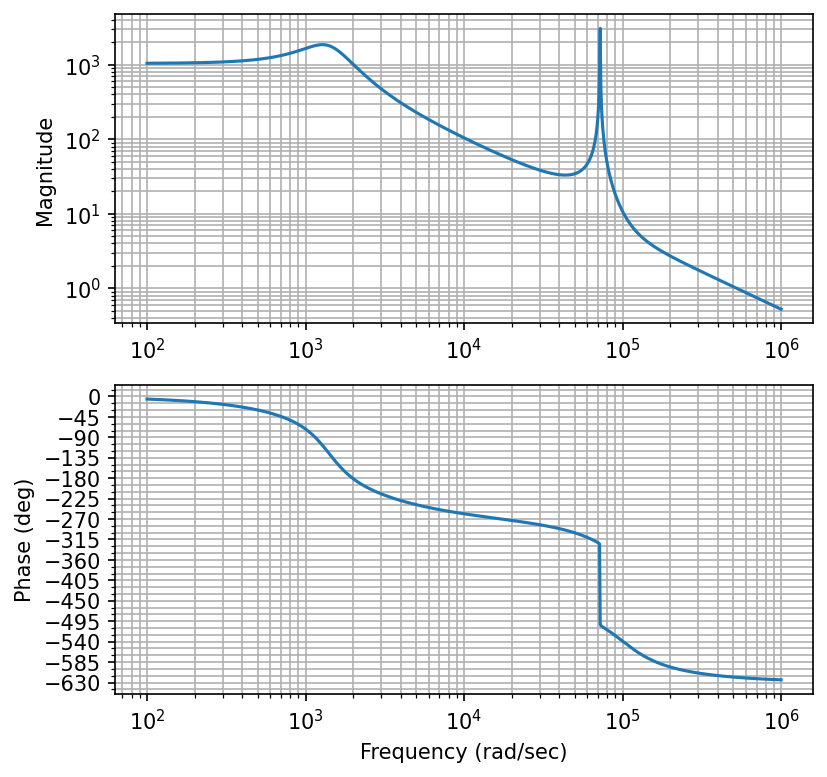

In [7]:
plt.figure(dpi=150, figsize=(6,6))
ctl.bode_plot(tf_ctl);

##### Análise gráfica no domínio do tempo

Similarmente, a resposta ao degrau de razão cíclica de $1\%$ fornece uma boa base de comparação do modelo linear com o comutado.

/home/eduardo/.local/lib/python3.8/site-packages/scipy/sparse/linalg/_matfuncs.py:708: LinAlgWarning: Ill-conditioned matrix (rcond=6.09441e-21): result may not be accurate.
  return solve(Q, P)


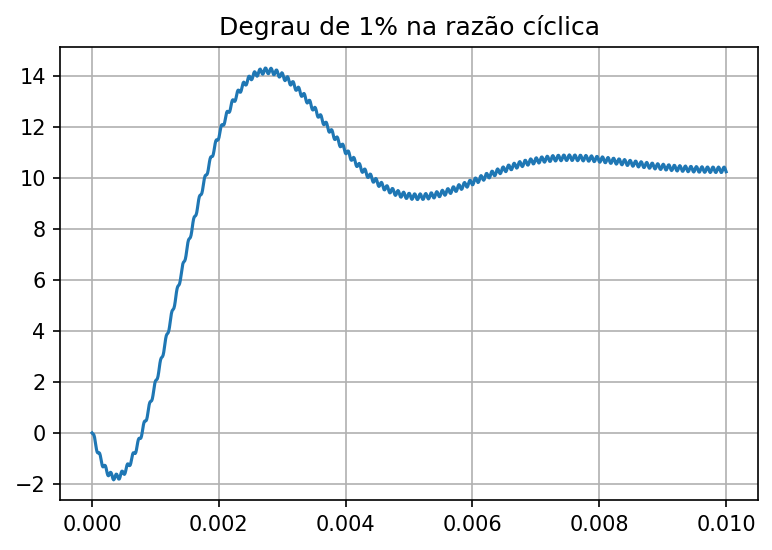

In [8]:
plt.figure(dpi=150)

t=np.linspace(0,10e-3, 1000)
# x=np.ones(t.shape)/100

_, x = ctl.step_response(tf_ctl,T=t, X0=0 );
plt.plot(t,x/100); plt.grid(True);
plt.title("Degrau de 1% na razão cíclica");

### IV) Simulações para validação

Para fins de comparação, foram simulados os seguintes modelos em Ngspice com captura de esquemático e geração de gráficos do KiCad:

1. Circuito comutado
2. Médio de grandes sinais com circuito equivalente (PWM Switch Modelling)
3. Médio de grandes sinais (equações diferenciais de estados)

Os parâmetros de circuito considerados em todo o desenvolvimento estão listados abaixo:
```spice
.tran 100ns 30ms uic   ; Simulação transiente até 30ms de passo 100ns com condições iniciais zeradas
```

```spice
.param Vi=48V          ; Tensão de entrada
.param RSd=1u          ; Resistência série nos diodos
.param Vd=0            ; Queda de tensão nos diodos
.param L1=1000uH
.param L2=100uH
.param C1=2uF
.param C2=20uF
.param R=50
```





Abaixo está ilustrado o modelo comutado:

![comutado](modelo_comutado.png)

Em seguida, o modelo de equações diferenciais de estados:

![ode](modelo_ode.png)


A figura abaixo ilustra o resultado do degrau de $d = 0.55$ para $ d =0.56$ aos $15 ms$ da análise transiente.

Observação: os modelos 2 e 3 se sobrepõem totalmente, impossibilitando distinção mútua.

![step](step_response_spice.png)